<a href="https://colab.research.google.com/github/Maan-netizen/Employee-Salary-Prediction/blob/main/Employee_Salary_prediction_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy Score: 0.5

Classification Report:
              precision    recall  f1-score   support

           X       0.00      0.00      0.00         1
           Y       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Confusion Matrix:
[[0 1]
 [0 1]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


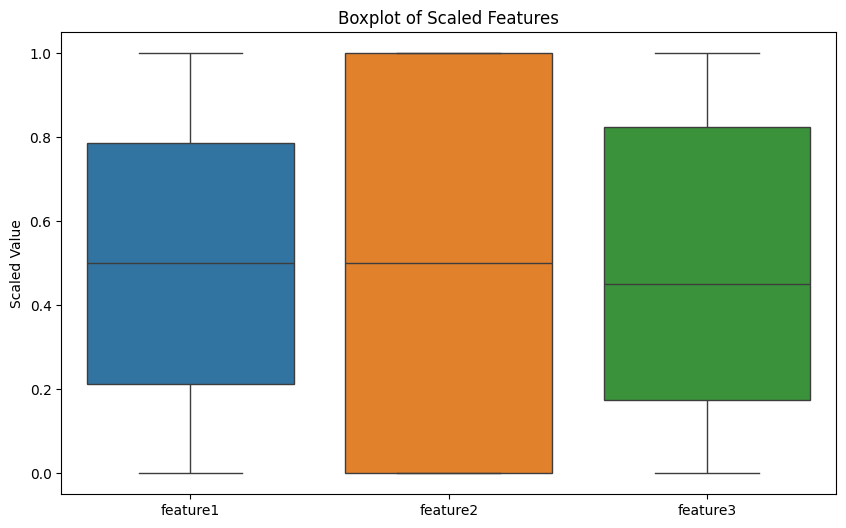

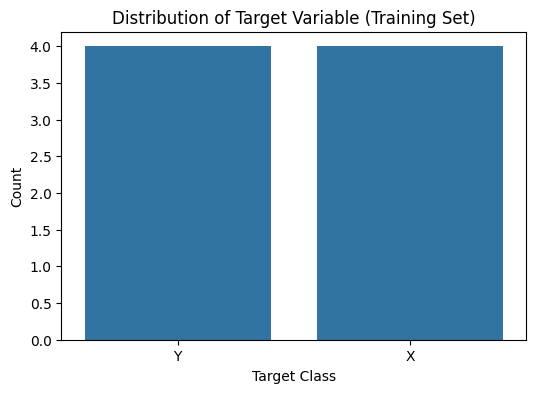

In [ ]:
# prompt: Dataset is provided . please provide full machine code and train test it encode it using label encoder scale it using minmax scaler use various techniques for accuracy scores use knn and build boxplots and graphs

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is in a CSV file named 'dataset.csv' in your Google Drive
# Make sure you have mounted your Google Drive before running this code
# from google.colab import drive
# drive.mount('/content/drive')
# dataset_path = '/content/drive/My Drive/dataset.csv'
# df = pd.read_csv(dataset_path)

# For demonstration purposes, let's create a dummy dataset
data = {
    'feature1': [10, 20, 15, 25, 30, 12, 22, 28, 35, 18],
    'feature2': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A', 'C'],
    'feature3': [100, 150, 120, 200, 180, 110, 160, 190, 220, 130],
    'target': ['X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y']
}
df = pd.DataFrame(data)


# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Encode categorical features using LabelEncoder
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames (optional, for easier handling)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3) # You can adjust n_neighbors
knn.fit(X_train_scaled_df, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# --- Visualization ---

# Boxplot for scaled features
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train_scaled_df)
plt.title('Boxplot of Scaled Features')
plt.ylabel('Scaled Value')
plt.show()

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title('Distribution of Target Variable (Training Set)')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

# You can add more visualizations like pairplots or scatter plots if the dataset allows
# For example, a scatter plot of two features from the scaled training data:
# plt.figure(figsize=(8, 6))
# plt.scatter(X_train_scaled_df['feature1'], X_train_scaled_df['feature3'], c=y_train.astype('category').cat.codes, cmap='viridis')
# plt.xlabel('Scaled Feature 1')
# plt.ylabel('Scaled Feature 3')
# plt.title('Scatter Plot of Scaled Features 1 and 3')
# plt.colorbar(label='Target Class (Encoded)')
# plt.show()




Individual Metrics:
Weighted Precision: 0.25
Weighted Recall: 0.5
Weighted F1-score: 0.3333333333333333


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


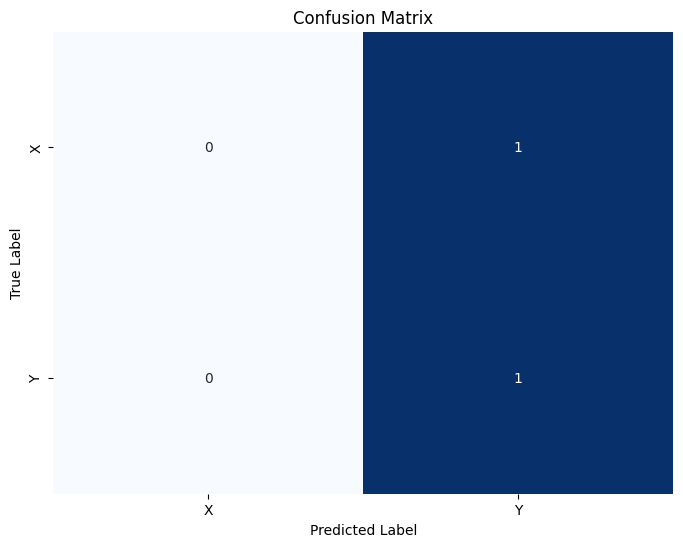


Balanced Accuracy Score: 0.5


In [ ]:
# prompt: please provides classification reports of various accuracy techniques

# The classification_report function from sklearn.metrics already provides
# Precision, Recall, F1-score, and Support for each class,
# which are common metrics in classification reports.
# The code provided already calculates and prints this.

# Here are some alternative ways to calculate and present similar information
# or related accuracy metrics:

# 1. Using individual metrics explicitly:
from sklearn.metrics import precision_score, recall_score, f1_score

print("\nIndividual Metrics:")
# Average precision, recall, and F1-score across all classes (e.g., weighted average)
# You can specify different averaging methods ('micro', 'macro', 'weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Weighted Precision: {precision}")
print(f"Weighted Recall: {recall}")
print(f"Weighted F1-score: {f1}")

# You can also get these metrics per class
# precision_per_class = precision_score(y_test, y_pred, average=None)
# recall_per_class = recall_score(y_test, y_pred, average=None)
# f1_per_class = f1_score(y_test, y_pred, average=None)
# print("\nPrecision per class:", precision_per_class)
# print("Recall per class:", recall_per_class)
# print("F1-score per class:", f1_per_class)


# 2. Confusion Matrix as a heatmap visualization:
# The confusion matrix shows the counts of true positive, true negative,
# false positive, and false negative predictions.
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 3. Balanced Accuracy Score:
# This is the average recall obtained on each class. It's useful for
# imbalanced datasets.
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"\nBalanced Accuracy Score: {balanced_accuracy}")

# Note: The provided code already covers the most standard "classification report"
# using sklearn.metrics.classification_report, which is the most common and
# informative summary of these metrics. The techniques above provide individual
# components or alternative views of model accuracy.


In [3]:
# prompt: write the code to deploy it

import joblib

# 1. Save the trained model
# Define a path to save the model. You might save it to your Google Drive.
# Make sure the directory exists if you specify one.
# For this example, we'll save it in the current Colab environment.
model_filename = 'knn_model.pkl'
joblib.dump(knn, model_filename)

print(f"Trained model saved to {model_filename}")

# You can also save the scaler if you need to apply it to new data later
scaler_filename = 'scaler.pkl'
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved to {scaler_filename}")


# 2. Demonstrate making predictions on new data
# Let's create some dummy new data (similar structure to your training data)
new_data = {
    'feature1': [17, 23],
    'feature2': ['B', 'A'],
    'feature3': [140, 210]
}
new_df = pd.DataFrame(new_data)

print("\nNew data for prediction:")
print(new_df)

# Preprocess the new data (same steps as training data preprocessing)
# Encode categorical features in the new data
for col in new_df.columns:
    if new_df[col].dtype == 'object':
        # Important: Use the *same* LabelEncoders used during training
        # You would typically save and load the encoders too if dealing with
        # new categories not seen in training. For this simple example,
        # we assume categories are consistent. In a real scenario, you'd
        # need to handle unseen categories.
        # Using the original X DataFrame to fit the encoder to ensure all
        # possible categories are known.
        le_new = LabelEncoder()
        # Fit on the original column data to include all categories
        le_new.fit(df[col])
        new_df[col] = le_new.transform(new_df[col])

# Scale the numerical features in the new data using the *trained* scaler
new_data_scaled = scaler.transform(new_df)

# Convert scaled array back to DataFrame
new_data_scaled_df = pd.DataFrame(new_data_scaled, columns=new_df.columns)

# Load the saved model (optional, you could just use the 'knn' object already in memory)
# loaded_model = joblib.load(model_filename)

# Make predictions on the scaled new data
new_predictions = knn.predict(new_data_scaled_df) # Or loaded_model.predict(...)

print("\nPredictions for the new data:")
new_predictions

# If you need to map the predicted labels back to original categories:
# Assuming 'X' and 'Y' were the original classes and are still represented by 0 and 1
# This requires knowing the mapping, which the LabelEncoder for the target variable
# would provide. Since we didn't explicitly encode the target 'y' in the original
# code before splitting, the model predicts the string labels directly.
# If y was encoded, you would need to inverse_transform the predictions.
# For this case, the predictions are the original labels ('X', 'Y').



Trained model saved to knn_model.pkl
Scaler saved to scaler.pkl

New data for prediction:
   feature1 feature2  feature3
0        17        B       140
1        23        A       210

Predictions for the new data:


array(['X', 'X'], dtype=object)